In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv',delimiter="\t")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1.data cleaning
#2.EDA
#3.textpreprocessing
#4.model building
#5.evaluation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
63,ham,"Sorry my roommates took forever, it ok if I co...",NaN,NaN,NaN
2363,spam,Fantasy Football is back on your TV. Go to Sky...,NaN,NaN,NaN
3327,ham,No we put party 7 days a week and study lightl...,NaN,NaN,NaN
3701,ham,Hey loverboy! I love you !! I had to tell ... ...,NaN,NaN,NaN
4032,ham,I am taking you for italian food. How about a ...,NaN,NaN,NaN


In [9]:
#drop the columns

In [10]:
df.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace=True)

In [11]:
df.sample(5)

,v1,v2
4940,ham,Omg you can make a wedding chapel in frontierv...
3590,ham,How much would it cost to hire a hitman
5176,ham,Company is very good.environment is terrific a...
1570,ham,No:-)i got rumour that you going to buy apartm...
1627,spam,You have been selected to stay in 1 of 250 top...


In [12]:
#rename the columns

In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#df.sample(5)

In [14]:
df.sample(5)

,target,text
4871,ham,Hi dis is yijue i would be happy to work wif Ì...
2198,ham,I'm in a movie. Call me 4 wat?
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000..."
3065,spam,Get a brand new mobile phone by being an agent...
2111,ham,Yar he quite clever but aft many guesses lor. ...


In [15]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB 393.8 kB/s eta 0:00:29
   ---------------------------------------- 0.1/11.2 MB 573.4 kB/s eta 0:00:20
   ---------------------------------------- 0.1/11.2 MB 787.7 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.2 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.2 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.2 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.2 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/11.2 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/11.2 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.2 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/11.2 MB 1.6 MB/s eta 0:00:07
   --- 

In [16]:
from sklearn .preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#"0 = ham"
#"1 = spam"

In [20]:
#remove missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.shape

(5169, 2)

## Exploratory data analysis

In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

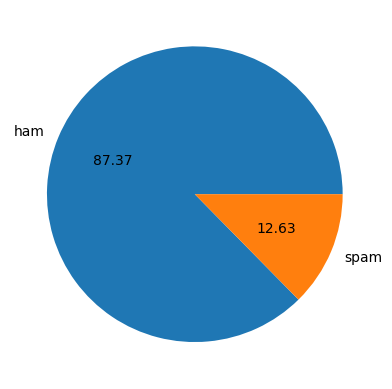

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
df.columns

Index(['target', 'text'], dtype='object')

In [30]:
df['num_characters'] = df['text'].apply(len)

C:\Users\praja\AppData\Local\Temp\ipykernel_8204\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
 df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\praja\AppData\Local\Temp\ipykernel_8204\1243567480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\praja\AppData\Local\Temp\ipykernel_8204\3821690119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

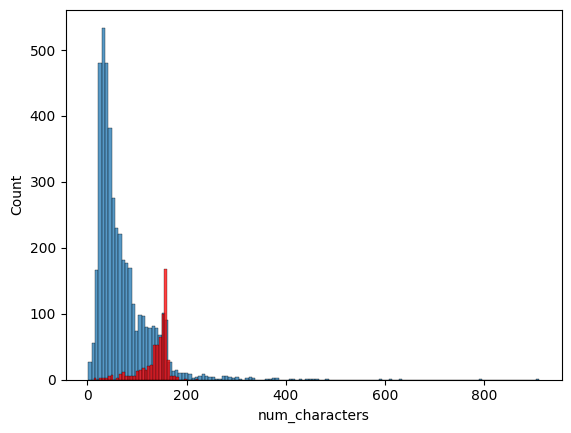

In [38]:
# Data visualization module
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

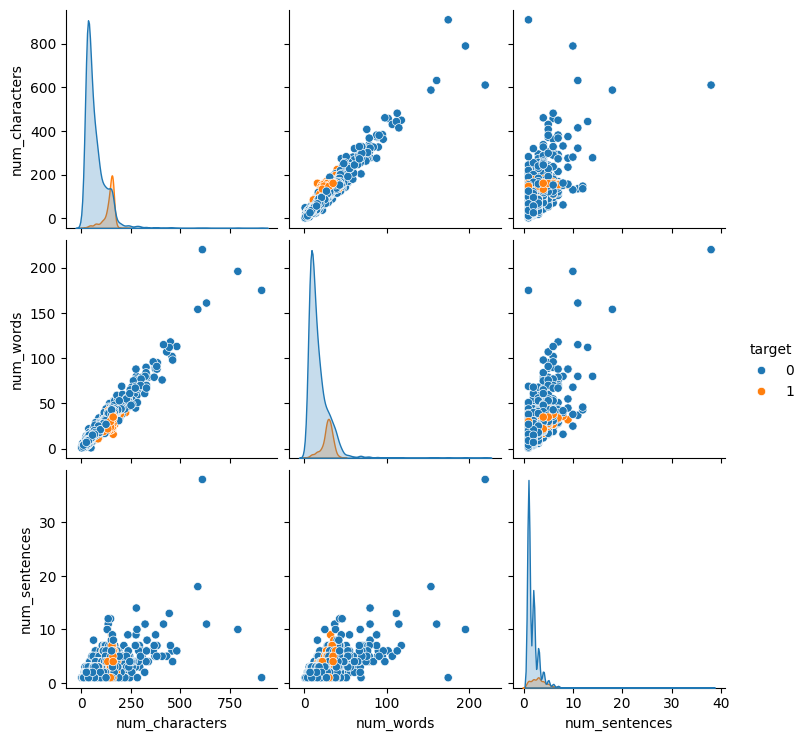

In [39]:
sns.pairplot(df,hue='target')

<Axes: >

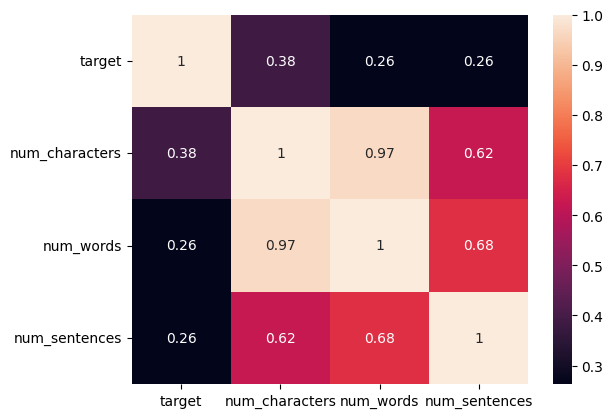

In [40]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## Data Preprocessing

In [41]:
#lowercase
#tokenize
#remove special characters like ,.| $
# stopword removel
#punctuation
#stemming

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
import string

## transform(text)---->apply above methods---->clean data

In [45]:
def transform_text(text):
    text = text.lower() #lowercassing
    text = nltk.word_tokenize(text) #tokenizing

    y = []

    for i in text:
        if i.isalnum(): #if the character is alphanumeric character (a-z,1-9)
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text: # stop word removal and punct removal
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text: #streming
        y.append(ps.stem(i))
    return " ".join(y)


In [46]:
transform_text("I'm gonna be home soon and i don't want to talk to anyone about it.")

'gon na home soon want talk anyon'

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\praja\AppData\Local\Temp\ipykernel_8204\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
!pip install wordcloud

In [51]:
import wordcloud

In [52]:
from wordcloud import WordCloud

In [53]:
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color = 'white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

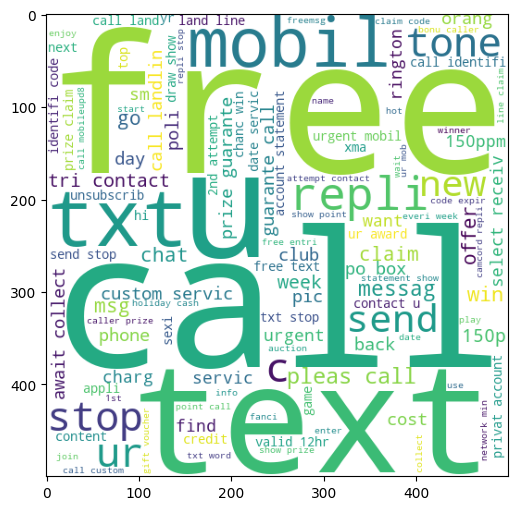

In [55]:
plt.figure(figsize= (15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

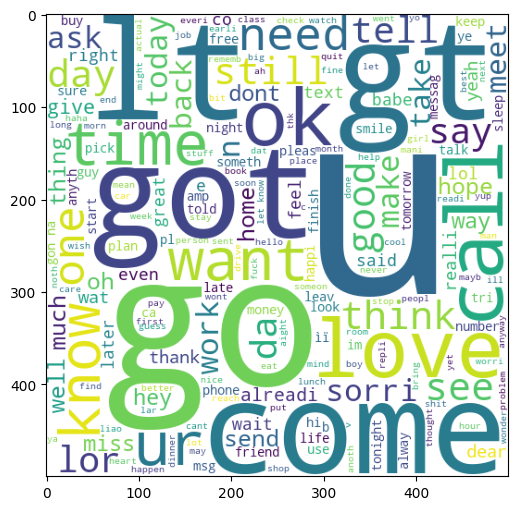

In [57]:
plt.figure(figsize= (15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []

for msg in df[df['target']==1 ]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

In [60]:
!pip install counter

In [61]:
from collections import Counter


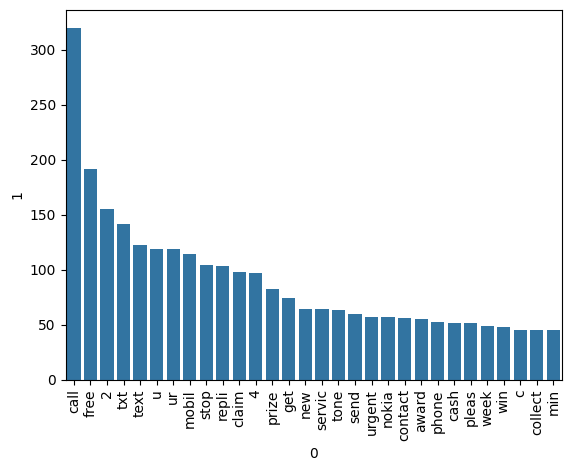

In [62]:

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus = []

for msg in df[df['target']==0 ]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35404

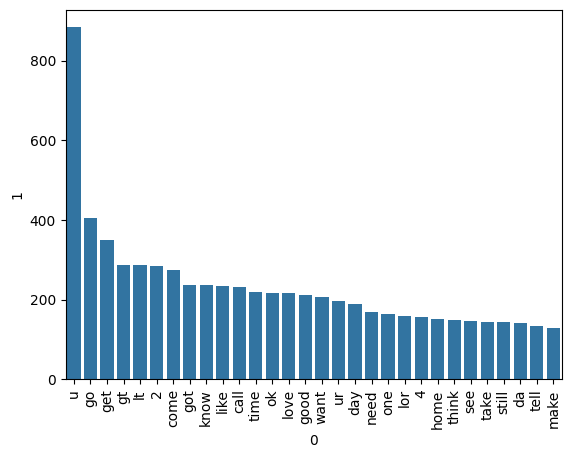

In [65]:

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## model Building

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [82]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
X.shape

(5169, 3000)

In [84]:
X[0].shape

(3000,)

In [85]:
y =df['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [96]:
gnb = GaussianNB()
mng = MultinomialNB()
bnb =  BernoulliNB()

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [100]:
mng.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [101]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [102]:
import pickle

In [103]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mng,open('model.pkl','wb'))